In [24]:
pip install yfinance bs4 nbformat pandas plotly 


Note: you may need to restart the kernel to use updated packages.


In [40]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [26]:
## Define Graphing Function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [27]:
import yfinance as yf
import pandas as pd

# 1️⃣ Créer un objet Ticker pour Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# 2️⃣ Récupérer l'historique des prix avec la période "max"
tesla_data = tesla_ticker.history(period="max")

# 3️⃣ Réinitialiser l'index du DataFrame
tesla_data.reset_index(inplace=True)

# 4️⃣ Afficher les 5 premières lignes
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [28]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Télécharger la page HTML contenant les données de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parser la page avec BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Extraire la première table contenant les revenus
tables = soup.find_all("table")

# Vérifier si une table a bien été trouvée
if len(tables) > 0:
    tesla_revenue_table = tables[0]  # Prendre la première table
    tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]  # Convertir en DataFrame
    
    # Nettoyer les noms de colonnes
    tesla_revenue.columns = ["Date", "Revenue"]
    
    # Supprimer les valeurs nulles ou incorrectes
    tesla_revenue.dropna(inplace=True)
    
    # Supprimer les caractères spéciaux des valeurs de la colonne Revenue
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(",|\$", "", regex=True)
    
    # Convertir "Revenue" en nombre
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
    # 8️⃣ Afficher les 5 premières lignes
    tesla_revenue.head()
    # Vérifier les 5 dernières lignes
    print(tesla_revenue.tail(5))
    
else:
    print("⚠️ Aucune table trouvée sur la page. Vérifiez l'URL ou le code de scraping.")
tesla_revenue.head()

    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [36]:
# Afficher les 5 dernières lignes du DataFrame tesla_revenue
tesla_revenue.tail(5)


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [37]:
# Création d'un objet Ticker pour GameStop
gme_ticker = yf.Ticker("GME")

# Extraction des données historiques complètes
gme_data = gme_ticker.history(period="max")

# Réinitialisation de l'index
gme_data.reset_index(inplace=True)

# Affichage des 5 premières lignes
print("📊 GameStop Stock Data:")
print(gme_data.head())


📊 GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [38]:
# URL contenant les revenus de GameStop
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Télécharger le contenu HTML de la page
html_data_gme = requests.get(url_gme).text

# Parser le HTML avec BeautifulSoup
soup_gme = BeautifulSoup(html_data_gme, "html.parser")

# Trouver tous les tableaux dans la page
tables_gme = soup_gme.find_all("table")

# Supposons que le premier tableau contient les revenus
gme_revenue_table = tables_gme[0]

# Convertir en DataFrame
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

# Renommer les colonnes
gme_revenue.columns = ["Date", "Revenue"]

# Nettoyer les données (Supprimer '$' et ',')
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace(",|\$", "", regex=True).astype(float)

# Afficher les 5 dernières lignes
print("\n📊 GameStop Revenue Data:")
print(gme_revenue.tail())



📊 GameStop Revenue Data:
    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


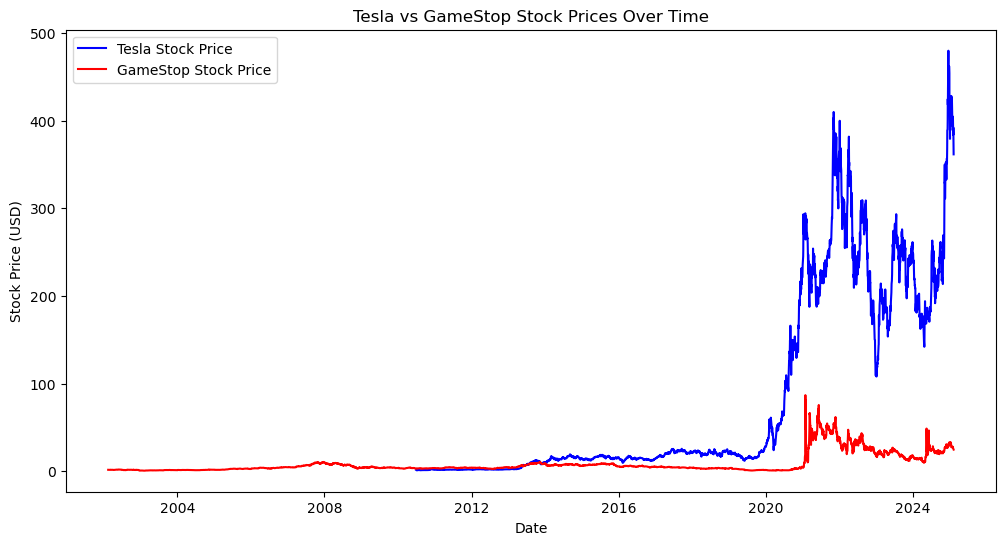

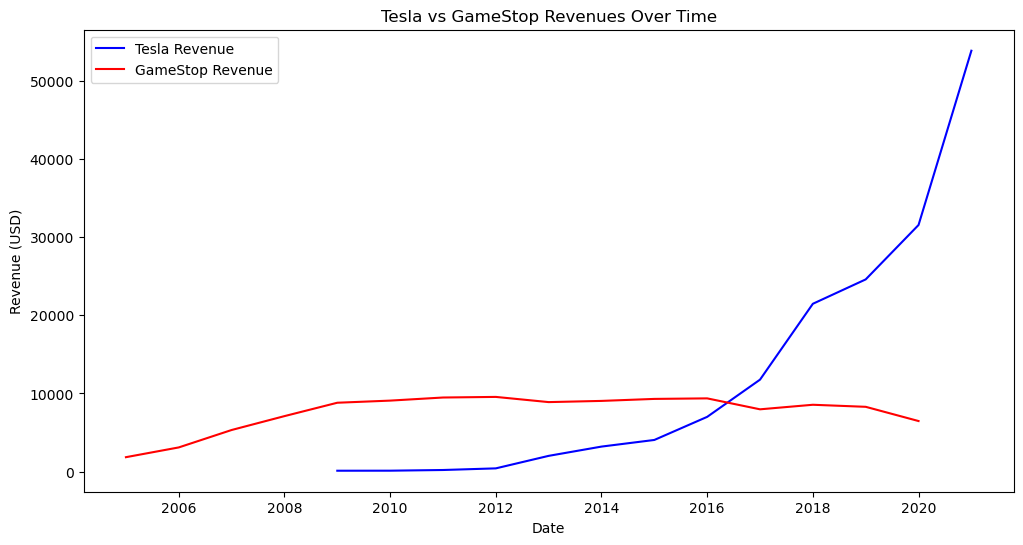

In [41]:
# 📈 Tracer l'évolution des prix des actions Tesla et GameStop
plt.figure(figsize=(12,6))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price", color="blue")
plt.plot(gme_data["Date"], gme_data["Close"], label="GameStop Stock Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla vs GameStop Stock Prices Over Time")
plt.legend()
plt.show()

# 📊 Tracer l'évolution des revenus Tesla et GameStop
plt.figure(figsize=(12,6))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Tesla Revenue", color="blue")
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"], label="GameStop Revenue", color="red")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.title("Tesla vs GameStop Revenues Over Time")
plt.legend()
plt.show()


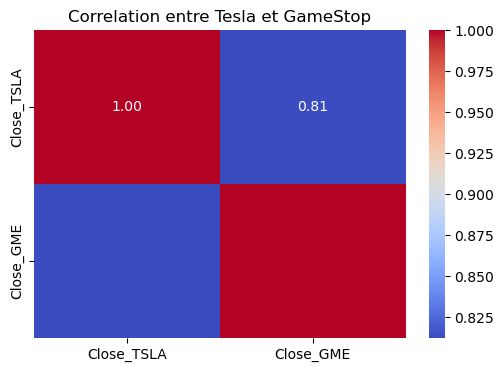

In [43]:
import seaborn as sns

# Fusionner les deux jeux de données sur la date
merged_data = tesla_data.merge(gme_data, on="Date", suffixes=("_TSLA", "_GME"))

# Calculer la corrélation entre les prix de clôture
correlation = merged_data[['Close_TSLA', 'Close_GME']].corr()

# 📊 Afficher la heatmap de corrélation
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation entre Tesla et GameStop")
plt.show()


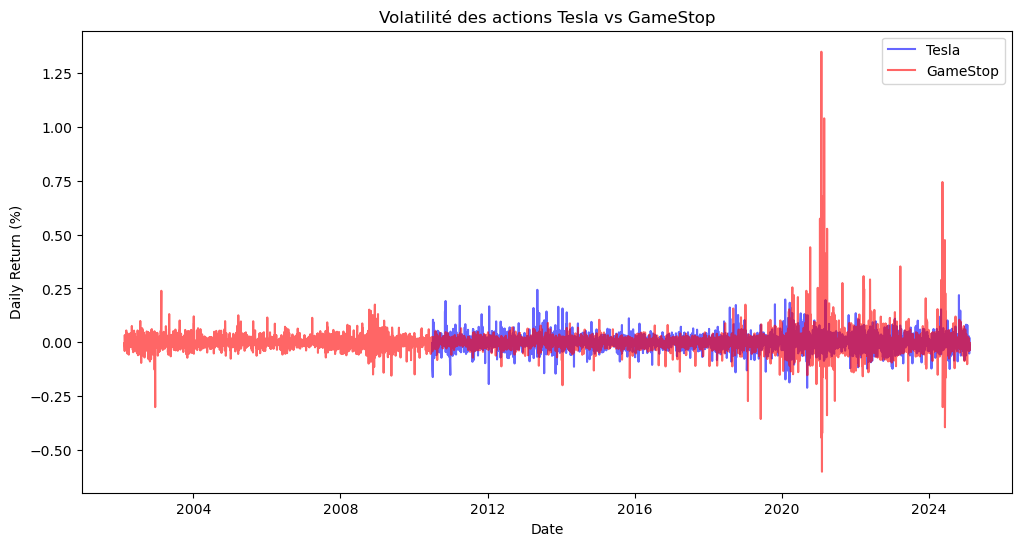

In [44]:
# Calculer le pourcentage de variation quotidienne
tesla_data["Daily Return"] = tesla_data["Close"].pct_change()
gme_data["Daily Return"] = gme_data["Close"].pct_change()

# Tracer les courbes de volatilité
plt.figure(figsize=(12,6))
plt.plot(tesla_data["Date"], tesla_data["Daily Return"], label="Tesla", color="blue", alpha=0.6)
plt.plot(gme_data["Date"], gme_data["Daily Return"], label="GameStop", color="red", alpha=0.6)

# Ajouter des légendes et titres
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Volatilité des actions Tesla vs GameStop")
plt.legend()
plt.show()


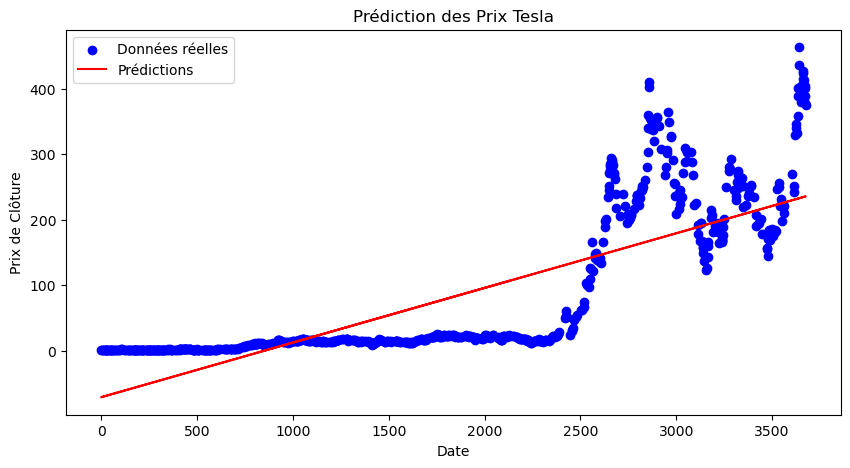

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Transformer la colonne 'Date' en nombres pour la régression
tesla_data["Date_Num"] = tesla_data["Date"].factorize()[0]

# Séparer les données en variables X (date) et y (prix de clôture)
X = tesla_data[["Date_Num"]]
y = tesla_data["Close"]

# Diviser en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle et l'entraîner
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les prix futurs
y_pred = model.predict(X_test)

# 📊 Tracer les résultats
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color="blue", label="Données réelles")
plt.plot(X_test, y_pred, color="red", label="Prédictions")
plt.xlabel("Date")
plt.ylabel("Prix de Clôture")
plt.title("Prédiction des Prix Tesla")
plt.legend()
plt.show()
